In [24]:
import torch
import matplotlib.pyplot as plt
from torch import nn, Tensor
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms

In [25]:
from torchvision import datasets, transforms
import torch

batch_size = 64
target_class = 1

transform = transforms.Compose([transforms.ToTensor()])

fashion_full = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
indices = [i for i, label in enumerate(fashion_full.targets) if label == target_class]
fashion_class = torch.utils.data.Subset(fashion_full, indices)

train_loader = torch.utils.data.DataLoader(fashion_class, batch_size=batch_size, shuffle=True)


In [26]:
len(indices)

6000

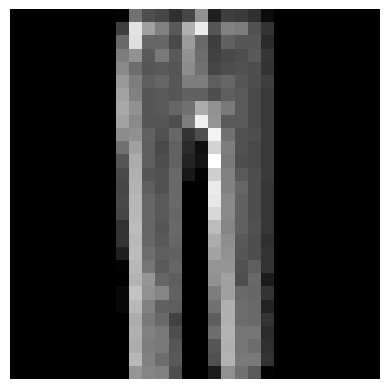

In [27]:
img, label = fashion_class[80]  # décompose le tuple
plt.imshow(img.squeeze(), cmap="gray")
plt.axis('off')
plt.show()

In [28]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [29]:
import CNN1 as CNN1
model = CNN1.CNN1()


In [30]:
n_epochs = 5000

optim = torch.optim.Adam(model.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)
model = model.to(device)

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.1494
epoch 100 | loss = 0.4748
epoch 200 | loss = 0.3561
epoch 300 | loss = 0.3051
epoch 400 | loss = 0.2833


KeyboardInterrupt: 

In [31]:
import torch

def generate_image(model, steps=100, device="cuda"):

    x_t = torch.randn(1, 1, 28, 28, device=device)

    dt = 1.0 / steps
    
    for step in range(steps):
        t = torch.tensor([[1.0 - step*dt]], device=device)  # t décroissant de 1 à 0
        v = model(x_t, t)
        x_t = x_t + dt * v  
    
    x_gen = torch.clip(x_t, 0.0, 1.0)
    return x_gen


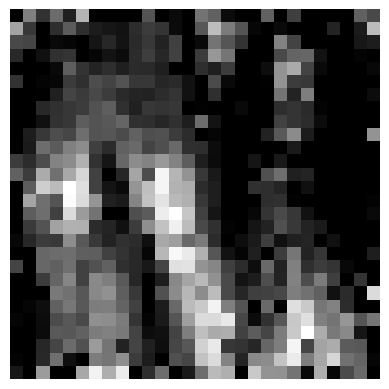

In [32]:
model = model.to(device)
x_gen = generate_image(model)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [33]:
import UNET as UNET


model2 = UNET.UNet4()

In [34]:
n_epochs = 5000
model2 = model2.to(device)

optim = torch.optim.Adam(model2.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)


for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model2(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 200 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.2182
epoch 200 | loss = 0.3744
epoch 400 | loss = 0.2152
epoch 600 | loss = 0.2137
epoch 800 | loss = 0.1895
epoch 1000 | loss = 0.1890
epoch 1200 | loss = 0.1605
epoch 1400 | loss = 0.1536
epoch 1600 | loss = 0.1047
epoch 1800 | loss = 0.1884
epoch 2000 | loss = 0.1092
epoch 2200 | loss = 0.1294
epoch 2400 | loss = 0.1612
epoch 2600 | loss = 0.0900


KeyboardInterrupt: 

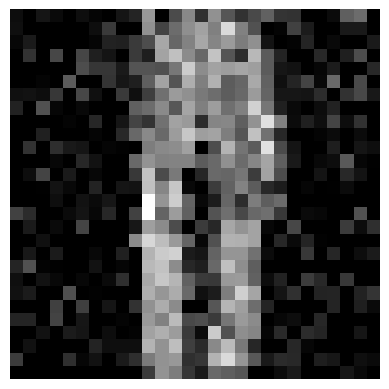

In [35]:
x_gen = generate_image(model2)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [36]:
import UNET_ChatGPT as UNET2


model3 = UNET2.UNetEnhanced()

In [37]:
torch.cuda.empty_cache()
batch_size = 64

In [38]:
n_epochs = 2000
model3 = model3.to(device)

optim = torch.optim.Adam(model3.parameters(), lr=0.001) 

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model3(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.1851
epoch 100 | loss = 0.1214
epoch 200 | loss = 0.1081
epoch 300 | loss = 0.0999
epoch 400 | loss = 0.0893
epoch 500 | loss = 0.0823
epoch 600 | loss = 0.0764
epoch 700 | loss = 0.0987
epoch 800 | loss = 0.0869
epoch 900 | loss = 0.0635
epoch 1000 | loss = 0.0844
epoch 1100 | loss = 0.0710
epoch 1200 | loss = 0.0766
epoch 1300 | loss = 0.0697
epoch 1400 | loss = 0.0743
epoch 1500 | loss = 0.0890
epoch 1600 | loss = 0.0822
epoch 1700 | loss = 0.0784
epoch 1800 | loss = 0.0682
epoch 1900 | loss = 0.0737


In [39]:
torch.cuda.empty_cache()

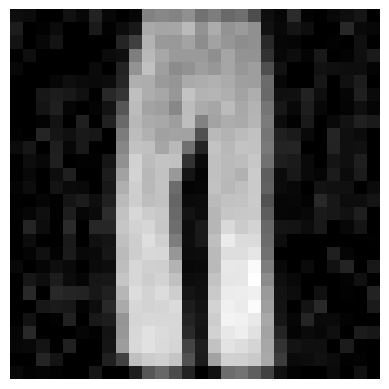

In [114]:
x_gen = generate_image(model3)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [41]:
import unet as UNET_OAI

model4 = UNET_OAI.UNetModel(
    image_size=28,                
    in_channels=1,                # RGB
    model_channels=128,           # largeur du UNet
    out_channels=1,               # reconstruit 3 canaux
    num_res_blocks=2,             # 1 ou 2, 2 donne + de qualité
    attention_resolutions=[14],   # attention à 16x16
    channel_mult=[1, 2],    
    dropout=0.1,                  # léger dropout
    use_checkpoint=True,         # mettre True si GPU faible
)

In [69]:
from nn import timestep_embedding

n_epochs = 1000
model4 = model4.to(device)
optim = torch.optim.Adam(model4.parameters(), 0.001)

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader))
    x_1 = x_1.to(device).float()

    x_0 = torch.randn_like(x_1)

    B = x_1.size(0)

    t = torch.rand(B, device=device)

    # --- Interpolation ---
    x_t = (1 - t.view(B,1,1,1)) * x_0 + t.view(B,1,1,1) * x_1

    # --- Champ de vecteur "réel" ---
    v_true = x_1 - x_0

    # --- Embedding temporel (OBLIGATOIRE pour UNet OpenAI) ---
    v_pred = model4(x_t, t * 1000)


    # --- Loss Flow Matching ---
    loss = ((v_pred - v_true) ** 2).mean()

    # --- Optimisation ---
    optim.zero_grad()
    loss.backward()
    optim.step()

    if(epoch%50 == 0):
        print(f"[epoch {epoch}] loss = {loss.item():.4f}")


[epoch 0] loss = 0.0841
[epoch 50] loss = 0.0774
[epoch 100] loss = 0.0877
[epoch 150] loss = 0.0844
[epoch 200] loss = 0.0837
[epoch 250] loss = 0.0947
[epoch 300] loss = 0.0724
[epoch 350] loss = 0.0684
[epoch 400] loss = 0.0821
[epoch 450] loss = 0.0786
[epoch 500] loss = 0.0679
[epoch 550] loss = 0.0927
[epoch 600] loss = 0.0844
[epoch 650] loss = 0.0756
[epoch 700] loss = 0.0653
[epoch 750] loss = 0.0679
[epoch 800] loss = 0.0650
[epoch 850] loss = 0.0706
[epoch 900] loss = 0.0637
[epoch 950] loss = 0.0855


In [107]:
import torch

def generate_image2(model, steps=100, device="cuda"):
    
    x_t = torch.randn(1, 1, 28, 28, device=device)
    dt = 1.0 / steps
    
    for step in range(steps):
        t_float = step * dt
        # convertir en entier pour l'embedding timestep
        if step == 0:
            print(t_float)
        t_int = torch.tensor([int(t_float * 1000)], device=device)
        v = model(x_t, t_int)
        x_t = x_t + dt * v  

    x_gen = torch.clamp(x_t, 0.0, 1.0)
    img = x_gen[0].permute(1, 2, 0).cpu().detach().numpy()
    
    return x_gen



0.0


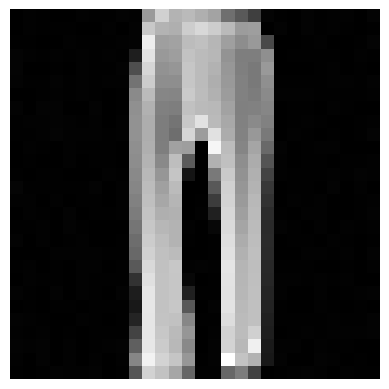

In [115]:
x_gen_OAI = generate_image2(model4)
import matplotlib.pyplot as plt
plt.imshow(x_gen_OAI[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [57]:
import torch
"""
def generate_image_reverse(model, steps=100, device="cuda"):

    x_t = torch.randn(1, 1, 28, 28, device=device)
    dt = 1.0 / steps
    
    for step in range(steps):
        t = torch.tensor([[step*dt]], device=device)  # t décroissant de 1 à 0
        v = model(x_t, t)
        x_t = x_t + dt * v  
    
    x_gen = torch.clip(x_t, 0.0, 1.0)
    return x_gen
"""

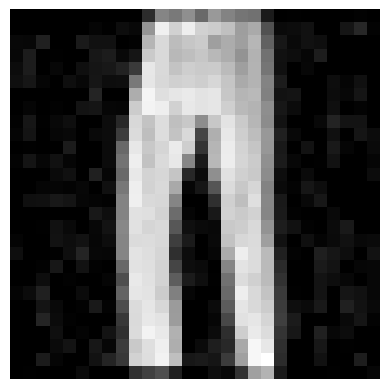

In [58]:
"""
x_gen = generate_image_reverse(model3)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()
"""